In [70]:
import pandas as pd

# Reading dataset
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [71]:
# Mengubah yang awalnya NaN jadi "None" sehingga dapat di lakukan Label Encoding
df.loc[:, "Sleep Disorder"] = df["Sleep Disorder"].fillna("None")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [72]:
# Label Encoding pada sleep disorder

# Using Mapping
df.loc[:, "Sleep Disorder"] = df["Sleep Disorder"].map({
    "None": 0,
    "Sleep Apnea": 1,
    "Insomnia": 2
})
df.loc[:, "Gender"] = df["Gender"].map({
    "Male": 0,
    "Female": 1,
})
df.loc[:, "BMI Category"] = df["BMI Category"].map({
    "Normal": 0,
    "Normal Weight": 1,
    "Overweight": 2,
    "Obese": 3,
})

# Using Categorical
df.loc[:, "Occupation"] = pd.Categorical(
    df["Occupation"].astype("category").cat.codes
)

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,0,27,9,6.1,6,42,6,2,126/83,77,4200,0
1,2,0,28,1,6.2,6,60,8,0,125/80,75,10000,0
2,3,0,28,1,6.2,6,60,8,0,125/80,75,10000,0
3,4,0,28,6,5.9,4,30,8,3,140/90,85,3000,1
4,5,0,28,6,5.9,4,30,8,3,140/90,85,3000,1


In [73]:
# Seperated into 2 values and change it into integer
df["Systolic"] = df["Blood Pressure"].str.split("/").str[0].astype(int)
df["Diastolic"] = df["Blood Pressure"].str.split("/").str[1].astype(int)

# Drop Column that is not used
df = df.drop(["Blood Pressure", "Person ID"], axis=1)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,0,27,9,6.1,6,42,6,2,77,4200,0,126,83
1,0,28,1,6.2,6,60,8,0,75,10000,0,125,80
2,0,28,1,6.2,6,60,8,0,75,10000,0,125,80
3,0,28,6,5.9,4,30,8,3,85,3000,1,140,90
4,0,28,6,5.9,4,30,8,3,85,3000,1,140,90


In [76]:
# Moved the systolic and Diastolic column
col = df.pop("Systolic")
df.insert(6, "Systolic", col)

col = df.pop("Diastolic")
df.insert(6, "Diastolic", col)

df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Diastolic,Systolic,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,0,27,9,6.1,6,42,83,126,6,2,77,4200,0
1,0,28,1,6.2,6,60,80,125,8,0,75,10000,0
2,0,28,1,6.2,6,60,80,125,8,0,75,10000,0
3,0,28,6,5.9,4,30,90,140,8,3,85,3000,1
4,0,28,6,5.9,4,30,90,140,8,3,85,3000,1


                              Age  Sleep Duration  Quality of Sleep  \
Age                      1.000000        0.344709          0.473734   
Sleep Duration           0.344709        1.000000          0.883213   
Quality of Sleep         0.473734        0.883213          1.000000   
Physical Activity Level  0.178993        0.212360          0.192896   
Diastolic                0.593839       -0.166570         -0.110151   
Systolic                 0.605878       -0.180406         -0.121632   
Stress Level            -0.422344       -0.811023         -0.898752   
Heart Rate              -0.225606       -0.516455         -0.659865   
Daily Steps              0.057973       -0.039533          0.016791   

                         Physical Activity Level  Diastolic  Systolic  \
Age                                     0.178993   0.593839  0.605878   
Sleep Duration                          0.212360  -0.166570 -0.180406   
Quality of Sleep                        0.192896  -0.110151 -0.121632 

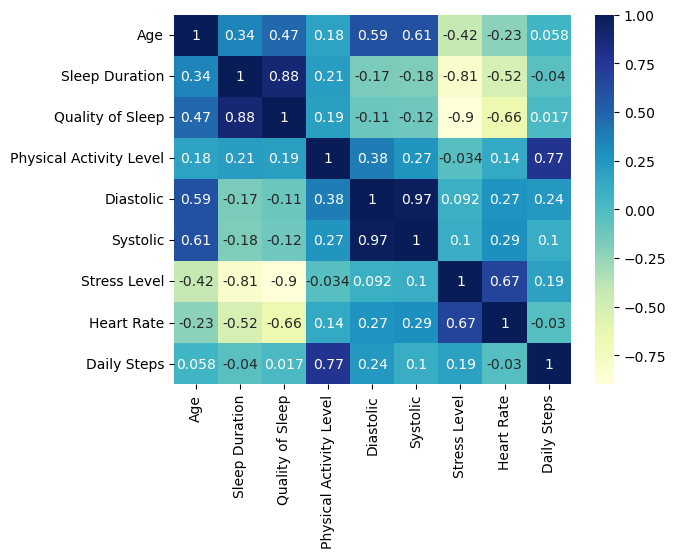

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasi antar variabel
correlation = df.corr(numeric_only=True)
print(correlation)

# Correlation heatmap
sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()